In [1]:
#载入各种数据科学以及可视化库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # 用于可视化缺失值分布
import scipy.stats as st
import statsmodels.api as sm
from sklearn import preprocessing,model_selection,linear_model

In [3]:
#载入数据
path = 'D:/windeqi/yan1/上/pythonym/wpath/hw/airbnb.csv'
d_ab = pd.read_csv(path,encoding='utf-8')

C:\Users\winde\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
d_ab.shape
# d_ab.describe()
# d_ab.info()

(48576, 19)

In [5]:
#观测数据
d_ab = d_ab.iloc[:,:-3]
d_ab.head(3).append(d_ab.tail(3))
# len(d_ab['host_id'].unique())/len(d_ab['host_id'])#host_id不同的占比为76%,且含信息量较少，可删去

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018/10/19,0.21,6,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019/5/21,0.38,2,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,NaN,NaN,1,365.0
48573,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27.0
48574,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2.0
48575,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23.0


In [3]:
#缺失值和异常值
d_ab.isnull().sum()#查看每列的存在nan情况

id                                    0
name                                 16
host_id                               1
host_name                            22
neighbourhood_group                   1
neighbourhood                         1
latitude                              1
longitude                             1
room_type                             1
price                                 1
minimum_nights                        1
number_of_reviews                    45
last_review                        9959
reviews_per_month                  9921
calculated_host_listings_count        8
availability_365                    224
Unnamed: 16                       48540
Unnamed: 17                       48567
Unnamed: 18                       48575
dtype: int64

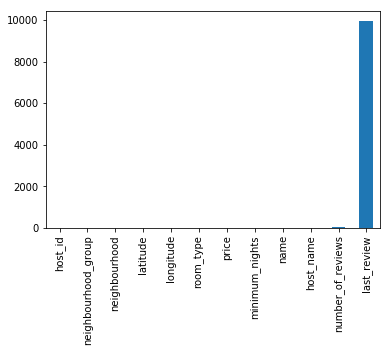

In [9]:
# nan可视化
missing = d_ab.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
# 可视化缺省值
msno.matrix(d_ab.sample(1000))

In [71]:
#查看每类个数,查看数据偏度
for i in range(0,d_ab.shape[1]):
    print(d_ab.columns[i])
    print(d_ab.iloc[:,i].value_counts(ascending = False))

neighbourhood_group
Manhattan        21404
Brooklyn         19912
Queens            5550
Bronx             1083
Staten Island      368
Name: neighbourhood_group, dtype: int64
neighbourhood
Williamsburg          3880
Bedford-Stuyvesant    3673
Harlem                2632
Bushwick              2447
Upper West Side       1951
                      ... 
Rossville                1
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64
latitude
40.71813    17
40.68444    13
40.69414    13
40.68634    13
40.71353    12
            ..
40.75272     1
40.72234     1
40.84362     1
40.61569     1
40.62066     1
Name: latitude, Length: 18962, dtype: int64
longitude
-73.95427    18
-73.95677    18
-73.95405    16
-73.95332    16
-73.95060    16
             ..
-73.82075     1
-73.92311     1
-73.78478     1
-73.99152     1
-73.81463     1
Name: longitude, Length: 14631, dtype: int64
room_type
Entire h

In [6]:
#计算每个变量的缺失值总数
total = d_ab.isnull().sum().sort_values(ascending = False)
#计算每个变量的缺失值占比
percent = round(d_ab.isnull().sum()/d_ab.isnull().count(),2).sort_values(ascending = False)
#连接两表呈现
missing = pd.concat([total,percent],
                    keys=['total','percent'],axis=1).sort_values(by='total',ascending = False)
missing

,total,percent
last_review,9959,0.21
reviews_per_month,9921,0.20
availability_365,224,0.00
number_of_reviews,45,0.00
host_name,22,0.00
name,16,0.00
calculated_host_listings_count,8,0.00
minimum_nights,1,0.00
price,1,0.00
room_type,1,0.00


In [10]:
#删除无意义列
d_ab.drop(['id','host_id','host_name','name'],axis=1,inplace = True)
d_ab.drop(['calculated_host_listings_count'],axis=1,inplace = True)

In [7]:
'''
空值处理
'''
d_ab['reviews_per_month'].fillna(0,inplace = True)#将平均每月评论数补0
#最新评论改为日期格式
d_ab['last_review'] = pd.to_datetime(d_ab['last_review'],infer_datetime_format=True,errors='coerce')
#最新评论空值补最早日期
earlydate = min(d_ab['last_review'])
d_ab['last_review'].fillna(earlydate,inplace = True)
#将last_review设置为最后一条评论与最早评论的间隔，并改名为review_interval时间间隔
d_ab['last_review'] = d_ab['last_review'].apply(lambda x :x.toordinal()-earlydate.toordinal())
d_ab.rename(columns={'last_review':'review_interval'},inplace=True)

In [8]:
d_ab.dropna(axis=0,how='any',inplace = True)#删除其余空值行,数量较少，不影响分析
# d_ab.info()

In [11]:
d_ab.head(1)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,review_interval,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2762,0.21,365.0


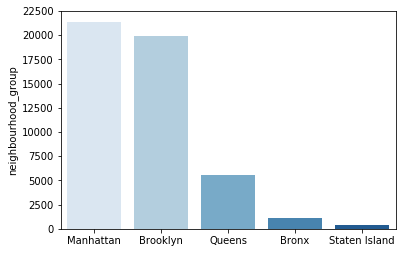

In [12]:
#探索性分析
#对neighbourhood_group进行分析
neibh_top5 = d_ab['neighbourhood_group'].value_counts()[:5]
neibh_top5_name = list(neibh_top5.index)
#可视化
sns.barplot(x=neibh_top5_name,y=neibh_top5,palette='Blues')

In [136]:
#变更为分类数据['Manhattan':1, 'Brooklyn':2, 'Queens':3,其余：0]
d_ab['neighbourhood_group'] = d_ab['neighbourhood_group'].apply(str)
neibh_top5_name[:3]
d_ab['nei_g'] = 0
n = d_ab['neighbourhood_group'].shape[0]
for i in range(n):
    for j in range(3):
        if d_ab.loc[i,'neighbourhood_group']==neibh_top5_name[j]:
            d_ab['nei_g'][i] = j+1


C:\Users\winde\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
#定义函数is_number检验字符串是否可转换为数字
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    return False

In [14]:
latitude_notnum = d_ab['latitude'][d_ab['latitude'].apply(is_number)==False].count()
#经度不可转换为数字的个数
longitude_notnum = d_ab['longitude'][d_ab['longitude'].apply(is_number)==False].count()
#纬度不可转化为数字的个数
print(latitude_notnum,longitude_notnum)

29 7


In [15]:
#经纬度中不是数字的占比小，删除对整体数据影响不大
d_ab['latitude'][d_ab['latitude'].apply(is_number)==False] = np.nan
d_ab['longitude'][d_ab['longitude'].apply(is_number)==False] = np.nan

C:\Users\winde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\winde\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
d_ab.dropna(inplace=True)
d_ab = d_ab.reset_index(drop=True)

C:\Users\winde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


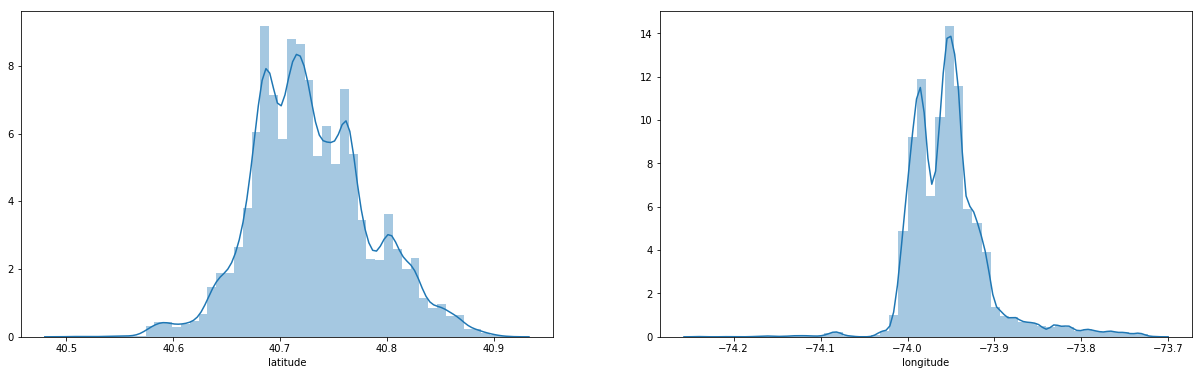

In [17]:
#经纬度分析
#1.经度展现 & 纬度展现
d_ab['latitude'] = d_ab['latitude'].apply(float)
d_ab['longitude'] = d_ab['longitude'].apply(float)
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(d_ab['latitude'], ax=axes[0])
sns.distplot(d_ab['longitude'], ax=axes[1])

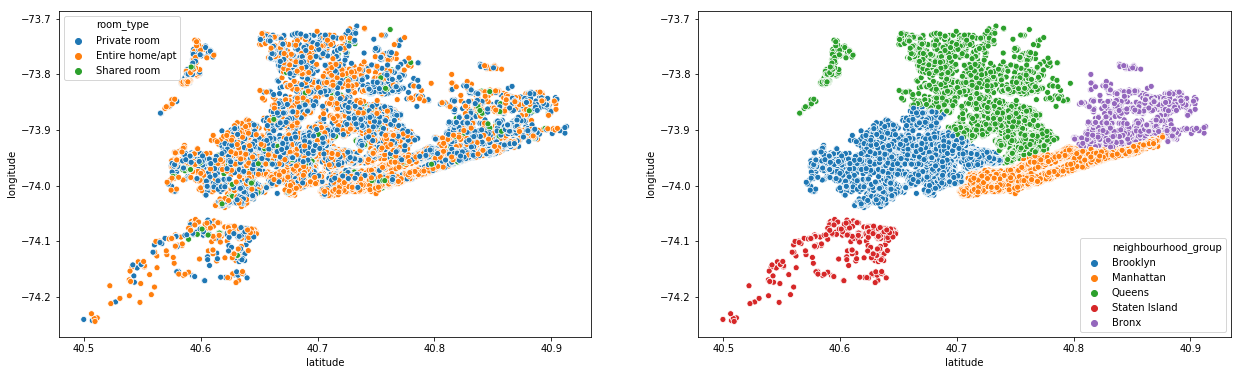

In [18]:
#经纬度分析
#2 经纬二维散点图展现,并分别按房屋类型、城区分布分类。
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.scatterplot(x= d_ab['latitude'], y=d_ab['longitude'],hue=d_ab['room_type'],ax=axes[0])
sns.scatterplot(x= d_ab['latitude'], y=d_ab['longitude'],hue=d_ab['neighbourhood_group'],ax=axes[1])

<Figure size 1512x432 with 0 Axes>

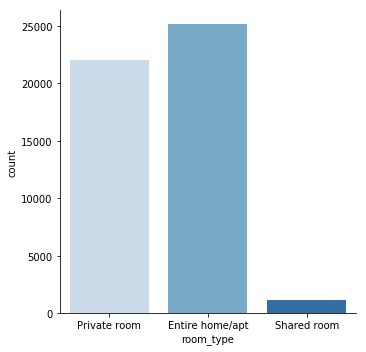

In [19]:
#房间类型分析,可知，以整套房和单个房为主。
plt.figure(figsize=(21,6))#制定画布大小
sns.catplot(x='room_type',kind='count',data=d_ab,palette='Blues')

In [155]:
#设置房屋类型：0-Entire home/apt，1-Private room，2-Shared room
r_type = list(d_ab['room_type'].value_counts().index)
d_ab['r_type'] = 0
for i in range(n):
    for j in range(3):
        if d_ab.loc[i,'room_type']==r_type[j]:
            d_ab['r_type'][i] = j

C:\Users\winde\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#d_ab[['room_type','r_type']]

C:\Users\winde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


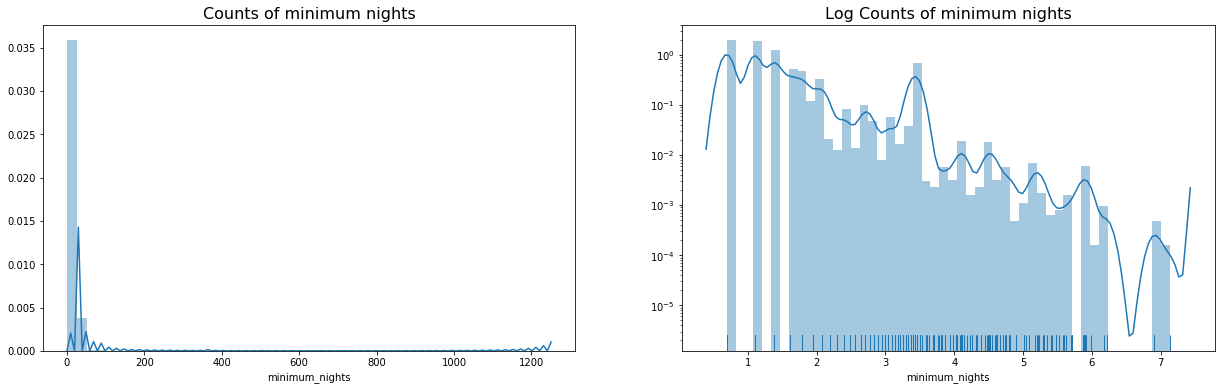

In [26]:
#对minimum night进行分析
d_ab['minimum_nights'] = d_ab['minimum_nights'].apply(int)
fig,ax=plt.subplots(1,2,figsize=(21,6))
sns.distplot(d_ab['minimum_nights'],ax=ax[0])
ax[0].set_title('Counts of minimum nights',fontsize=16)
#可以看出百分之99的数据都集中在45以内。对于严重的偏态数据，可以使用numpy中的log1p()函数进行处理，其中：
sns.distplot(np.log1p(d_ab['minimum_nights']),ax=ax[1],rug=True,kde=True)
ax[1].set_title('Log Counts of minimum nights',fontsize=16)
ax[1].set_yscale('log')

In [37]:

d_ab.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,review_interval,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2762,0.21,365.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2976,0.38,355.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,365.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,3021,4.64,194.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2793,0.10,0.0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,3008,0.59,129.0
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2383,0.40,0.0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3010,3.47,220.0
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2307,0.99,0.0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2995,1.33,188.0


C:\Users\winde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


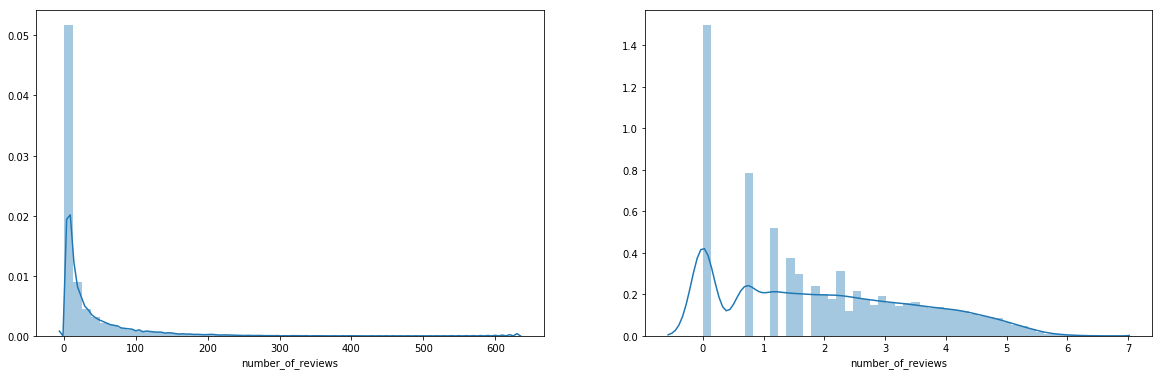

In [36]:
d_ab['number_of_reviews'] = d_ab['number_of_reviews'].apply(int)
fig,ax = plt.subplots(1,2,figsize = (20,6))
sns.distplot(d_ab['number_of_reviews'],ax=ax[0])
sns.distplot(np.log1p(d_ab['number_of_reviews']),ax=ax[1])

C:\Users\winde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'log :Count of review per month')

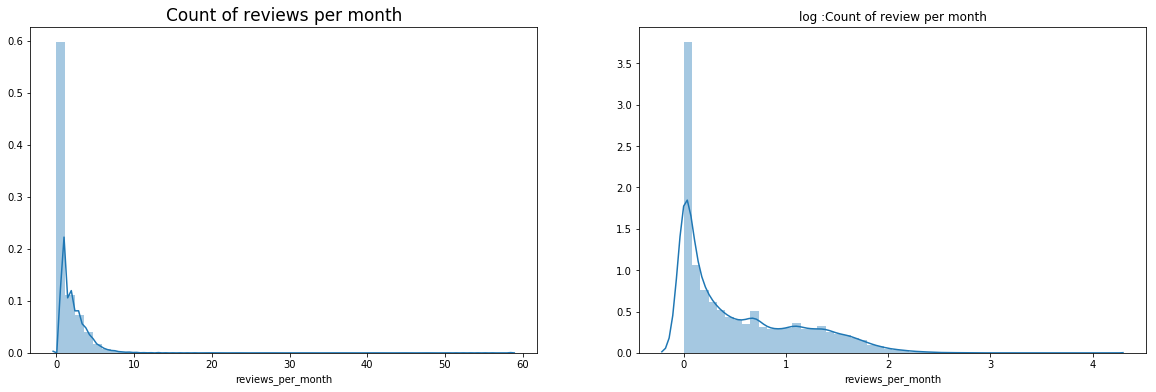

In [42]:
#对Reviews per month分析
d_ab['reviews_per_month'] = d_ab['reviews_per_month'].apply(float)
fig,ax = plt.subplots(1,2,figsize = (20,6))
sns.distplot(d_ab['reviews_per_month'],ax=ax[0])
ax[0].set_title('Count of reviews per month',fontsize = 17)
sns.distplot(np.log1p(d_ab['reviews_per_month']),ax=ax[1])
ax[1].set_title('log :Count of review per month')
#Reviews per month 数据的偏态非常严重，即使进行对数处理，也呈现出非常严重的偏态分布。

In [40]:
#Availability 365
print(d_ab['availability_365'].value_counts(ascending = False))
d_ab['availability_365'] = d_ab['availability_365'].apply(int)

0.0      17358
365.0     1280
364.0      485
1.0        404
89.0       352
         ...  
195.0       26
196.0       24
181.0       22
183.0       21
202.0       20
Name: availability_365, Length: 366, dtype: int64


In [117]:
d_ab['price'].describe()

count    48317.000000
mean       152.810005
std        240.983323
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

C:\Users\winde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'QQplot')

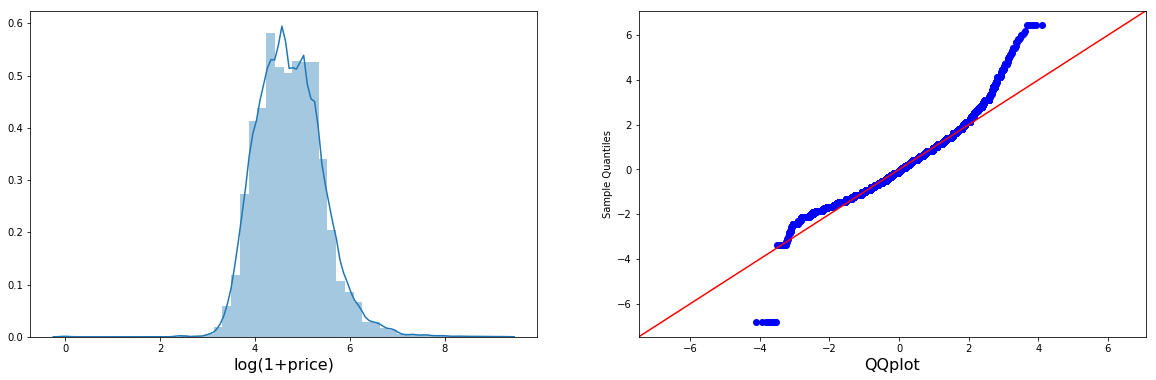

In [39]:
#对price进行分析
d_ab['price'] = d_ab['price'].apply(float)
fig,ax = plt.subplots(1,2,figsize = (20,6))
log_price = np.log1p(d_ab['price'])
sns.distplot(log_price,ax = ax[0])
ax[0].set_xlabel('log(1+price)',fontsize=16)
sm.qqplot(data=log_price,dist=st.norm,line='45',fit=True,ax=ax[1])
ax[1].set_xlabel('QQplot',fontsize=16)

Text(0.5,1,'heatmap')

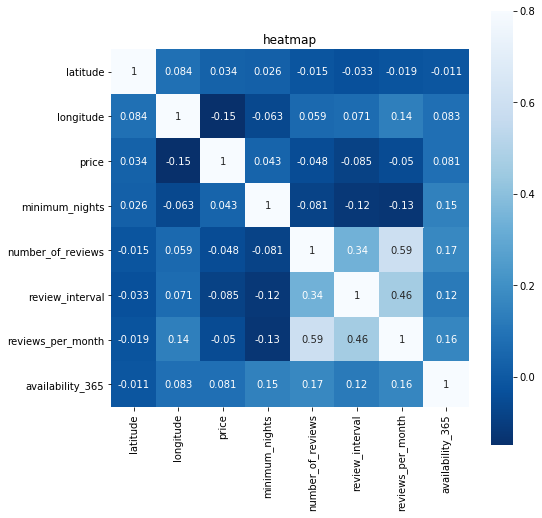

In [43]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(d_ab.corr(), vmax=0.8, square=True,annot=True,cmap='Blues_r')
ax.set_title('heatmap')

C:\Users\winde\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


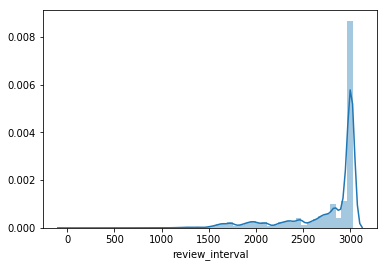

In [70]:
sns.distplot(d_ab['review_interval'])

In [44]:
#建模前数据准备
minmax_scaler = preprocessing.MinMaxScaler()#0-1标准化
zscore_scaler = preprocessing.StandardScaler()

In [45]:

d_ab['number_of_reviews'] = d_ab['number_of_reviews'].apply(int)
d_ab['log_review_per_month']= np.log1p(d_ab['reviews_per_month'])
d_ab['log_price'] = np.log1p(d_ab['price'])
d_ab['log_minimum_night'] = np.log1p(d_ab['minimum_nights'])
d_ab['log_availability_365'] = np.log1p(d_ab['availability_365'])
d_ab['log_number_of_reviews'] =np.log1p(d_ab['number_of_reviews'])

In [46]:
d_ab.select_dtypes(include='object').columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [94]:
data2 = pd.get_dummies(d_ab,columns=['neighbourhood_group','room_type'])

In [97]:
data2.head(1)

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,review_interval,reviews_per_month,availability_365,log_review_per_month,...,log_availability_365,log_number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Kensington,0.357393,0.511921,0.0149,0.0,0.014308,0.91336,0.00359,1.0,0.046652,...,1.0,0.357227,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
#经测试标准后达到50多，不标准化反到60多
data2.iloc[:,1:]=minmax_scaler.fit_transform(data2.iloc[:,1:])

In [98]:
# data2.drop(['neighbourhood', 'latitude', 'longitude', 'price'],axis=1,inplace=True)
# 删除有共线性的特征
data2.drop(['neighbourhood', 'price','minimum_nights','number_of_reviews',
           'reviews_per_month','availability_365'],axis=1,inplace=True)

In [68]:
data2.drop('log_review_per_month',axis=1,inplace=True)

In [99]:
data2.head(3)

,latitude,longitude,review_interval,log_review_per_month,log_price,log_minimum_night,log_availability_365,log_number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.357393,0.511921,0.913360,0.046652,0.544017,0.000000,1.000000,0.357227,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.614199,0.490469,0.984127,0.078827,0.588521,0.000000,0.995307,0.593982,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.748252,0.569257,0.000000,0.000000,0.544738,0.107656,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [113]:
#方差分析1
y1 = data2[['log_review_per_month']][data2['neighbourhood_group_Bronx']==1]
y2 = data2[['log_review_per_month']][data2['neighbourhood_group_Brooklyn']==1]
y3 = data2[['log_review_per_month']][data2['neighbourhood_group_Manhattan']==1]
y4 = data2[['log_review_per_month']][data2['neighbourhood_group_Queens']==1]
y5 = data2[['log_review_per_month']][data2['neighbourhood_group_Staten Island']==1]
st.f_oneway(y1,y2,y3,y4,y5)#得到拒绝原假设，即不同地区的满意度存在显著差异

F_onewayResult(statistic=array([182.05852704]), pvalue=array([4.00677166e-155]))

In [114]:
#方差分析2
y1 = data2[['log_review_per_month']][data2['room_type_Entire home/apt']==1]
y2 = data2[['log_review_per_month']][data2['room_type_Private room']==1]
y3 = data2[['log_review_per_month']][data2['room_type_Shared room']==1]
st.f_oneway(y1,y2,y3)#得到拒绝原假设，即不同地区的满意度存在显著差异

F_onewayResult(statistic=array([12.85996428]), pvalue=array([2.60900959e-06]))

In [56]:
#得到列联表：
ctable = pd.crosstab(d_ab['neighbourhood_group'],d_ab['room_type'])

In [57]:
st.chi2_contingency(ctable)

(1537.1835164789404,
 0.0,
 8,
 array([[5.62442419e+02, 4.92808824e+02, 2.57487572e+01],
        [1.03523745e+04, 9.07069118e+03, 4.73934341e+02],
        [1.11270986e+04, 9.74950000e+03, 5.09401408e+02],
        [2.88661475e+03, 2.52923529e+03, 1.32149959e+02],
        [1.91469760e+02, 1.67764706e+02, 8.76553438e+00]]))

In [115]:
x = data2.drop('log_review_per_month',axis=1)
y = data2['log_review_per_month']

In [116]:
# x = x.iloc[:,[0,1,2,3,4]]
x.head(1)

,latitude,longitude,review_interval,log_price,log_minimum_night,log_availability_365,log_number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.357393,0.511921,0.91336,0.544017,0.0,1.0,0.357227,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [117]:
#数据集切分
x_train, x_test, y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

In [118]:
#回归分析
mdl_ols = linear_model.LinearRegression()
mdl_ols.fit(x_train,y_train)
coef_ols = mdl_ols.coef_
yhat = mdl_ols.predict(x_train)
ypred = mdl_ols.predict(x_test)

In [122]:
x.columns

Index(['latitude', 'longitude', 'review_interval', 'log_price',
       'log_minimum_night', 'log_availability_365', 'log_number_of_reviews',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [123]:
mdl_ols.coef_

array([-0.03988149,  0.06120546,  0.04495044, -0.05905911, -0.18036895,
        0.06403746,  0.33483225,  0.00850842, -0.01329851,  0.00373146,
        0.00039174,  0.0006669 ,  0.00420061, -0.0024618 , -0.00173881])

In [124]:
'''
回归模型的评价
对回归模型进行评价通常采用RMSE（均方根误差）和拟合优度等指标
sklearn库中的metrics模块提供了相关函数
'''
from sklearn import metrics
rmse = metrics.mean_squared_error(y_train,yhat)**0.5
frmse = metrics.mean_squared_error(y_test,ypred)**0.5
print(f'样本内rmse为:{rmse},样本外rmse为:{frmse}')
print(f'样本内评分为:{metrics.r2_score(y_train,yhat)},样本外评分为:{metrics.r2_score(y_test,ypred)}')

样本内rmse为:0.08435611396796029,样本外rmse为:0.08441110890583
样本内评分为:0.6419473942911513,样本外评分为:0.640408888981308


In [ ]:
#按照国家，性别，年龄分组并求各变量均值
sucide_country3=pd.DataFrame(suicide[['suicides_no','population','suicides/100k pop',
                                      'HDI for year','gdp_per_capita',
                                      'gdp_for_year']].groupby(([suicide['country'],suicide['sex'],
                                                                 suicide['age']])).mean())
sucide_country3.apply(lambda x:np.sum(x.isnull()))
#按照地域、房屋类型、价格分组

In [ ]:
for i in range(6):#分别聚2-7类。比较性能评价
    n=i+2
from sklearn import cluster
from sklearn import metrics
#K均值算法
kmeans=cluster.KMeans(n_clusters=n).fit(sucide_country3)
    labels,labels_c=kmeans.labels_,,mdl_hc.labels_
    a1=metrics.davies_bouldin_score(sucide_country3,labels)#DBI指数
    a2=metrics.silhouette_score(sucide_country3,labels)
#层次聚类
    mdl_hc=cluster.AgglomerativeClustering(n_clusters=n).fit(sucide_country3)
    c1=metrics.davies_bouldin_score(sucide_country3,labels_c)
    c2=metrics.silhouette_score(sucide_country3,labels_c)
    score=a1,a2,c1,c2,
    print("聚",n,"类")
    print(list(score))
temp['knn_labels']=labels
temp['ceng_labels']=labels_c
group_mean=temp.groupby('ceng_labels')['suicides/100k pop'].mean()
